# Projeto Um Mal Silencioso 

![Alt](https://socgastro.org.br/novo/wp-content/uploads/2019/07/hepatite_c-1.jpg)

# Escopo do projeto

* 1 - Introdução 
* 2 - Importações dos pacotes
* 3 - Funções
* 4 - Leitura dos dados
* 5 - Tratamento adicionais nos dados
* 6 - Visualização dos dados 
* 7 - Conclusões

# 1 - Introdução

Olá, esse projeto tem como objetivo analisar os dados de vacinação do Programa Nacional De Imunização a fim de estudar um dos mais graves problemas de saúde pública no Brasil e no mundo, as _**Hepatites Virais**_. Nele o foco foram os dados de vacinação, casos e óbitos da Hepatite A, B e C. As 

# 2 - Importações dos pacotes

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from funcoes import plota_grafico, thousand_formatter, million_formatter

# 3 - Funções 

A função 'plota_gráfico' foi a função utilizada para plotar todos os gráficos analisados nesse notebook

In [6]:
help(plota_grafico)

Help on function plota_grafico in module funcoes:

plota_grafico(dados: pandas.core.frame.DataFrame, x: str, y: str, hue=None, title='', subtitle=None, xlabel=None, ylabel=None, dict_hue_palette=None, palette_sns=None, formatter_x=None, formatter_y=None, file_name=None, xlim=None, ylim=None, hue_legend=None, style='darkgrid', show=True, ax=None, color_xlabel='dimgray', color_ylabel='dimgray', color_title='black', color_sub='dimgray', color_xticks='dimgray', color_yticks='dimgray', legend=False, legend_title='', title_loc='left', kind='line', intervalo_ano=None, **kwargs)
    Função que plota um gráfico entre duas variáveis, podendo ser um 'lineplot' do seaborn, 'scatterplot' ou um 'barplot' do seaborn
    
    Parâmetros:
    
            dados : DataFrame do pandas onde estão os dados, tipo=pd.DataFrame 
            x : coluna associada ao eixo x, tipo : str
            y : coluna associada ao eixo y, tipo : str
            hue : variável associada à tonalidade, tipo : str, padrão : N

As funções 'thousand_formatter' e 'million_formatter' são funções que tem o objetivo formatarem os eixos dos gráficos

In [7]:
help(million_formatter)

Help on function million_formatter in module funcoes:

million_formatter(x, pos)
    Função responsável por formatar um eixo do 'matplotlib' dividindo os valores por Milhão, mostrando duas casas decimais depois da vírgula e colocando a palavra 'Mi' após os valores indicando a grandeza



In [8]:
help(thousand_formatter)

Help on function thousand_formatter in module funcoes:

thousand_formatter(x, pos)
    Função responsável por formatar um eixo do 'matplotlib' dividindo os valores por Mil, mostrando duas casas decimais depois da vírgula e colocando a palavra 'Mil' após os valores indicando a grandeza



Transformando as funções em funções do tipo 'matplotlib.ticker', pois dessa forma pode ser passada como parâmetro das funções formatadores dos eixos do 'matplotlib'

In [9]:
million_formatter = FuncFormatter(million_formatter)
thousand_formatter = FuncFormatter(thousand_formatter)

# 4 - Leitura dos dados

In [10]:
casos = pd.read_csv('../dados_tratados/casos_obitos_hep')
vacinas = pd.read_csv('../dados_tratados/vacinas_hep')
dados_reg = pd.read_csv('../dados_tratados/casos_obitos_por_regiao')

# 5 - Tratamento adicionais no dados

In [11]:
dados_reg.head()

,Ano,virus,Regiao,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k
0,2001,A,Norte,2868.0,NaN,13245084.0,21.653317,NaN
1,2001,B,Norte,820.0,NaN,13245084.0,6.190976,NaN
2,2001,C,Norte,287.0,NaN,13245084.0,2.166842,NaN
3,2002,A,Norte,2755.0,NaN,13504599.0,20.400458,NaN
4,2002,B,Norte,1032.0,NaN,13504599.0,7.641841,NaN


In [12]:
casos.head()

,Ano,virus,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k
0,2001,A,21011.0,NaN,172385826.0,12.188357,NaN
1,2001,B,8344.0,NaN,172385826.0,4.840305,NaN
2,2001,C,6713.0,NaN,172385826.0,3.894172,NaN
3,2002,A,14468.0,NaN,174632960.0,8.284805,NaN
4,2002,B,8841.0,NaN,174632960.0,5.062618,NaN


In [13]:
casos.head()

,Ano,virus,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k
0,2001,A,21011.0,NaN,172385826.0,12.188357,NaN
1,2001,B,8344.0,NaN,172385826.0,4.840305,NaN
2,2001,C,6713.0,NaN,172385826.0,3.894172,NaN
3,2002,A,14468.0,NaN,174632960.0,8.284805,NaN
4,2002,B,8841.0,NaN,174632960.0,5.062618,NaN


In [14]:
#Juntando os dados da tabela casos com a tabela de vacinas
dados = pd.merge(casos, vacinas, on=['Ano', 'virus'], how='outer')
dados.head()

,Ano,virus,Casos,Obitos,Pop,taxa_incid_por100k,taxa_obitos_por100k,Cobertura_vacina_100Hab,Doses_totais
0,2001,A,21011.0,NaN,172385826.0,12.188357,NaN,NaN,41062.0
1,2001,B,8344.0,NaN,172385826.0,4.840305,NaN,91.88,35206019.0
2,2001,C,6713.0,NaN,172385826.0,3.894172,NaN,NaN,NaN
3,2002,A,14468.0,NaN,174632960.0,8.284805,NaN,NaN,58788.0
4,2002,B,8841.0,NaN,174632960.0,5.062618,NaN,91.47,30906741.0


# 6 - Análise Exploratória

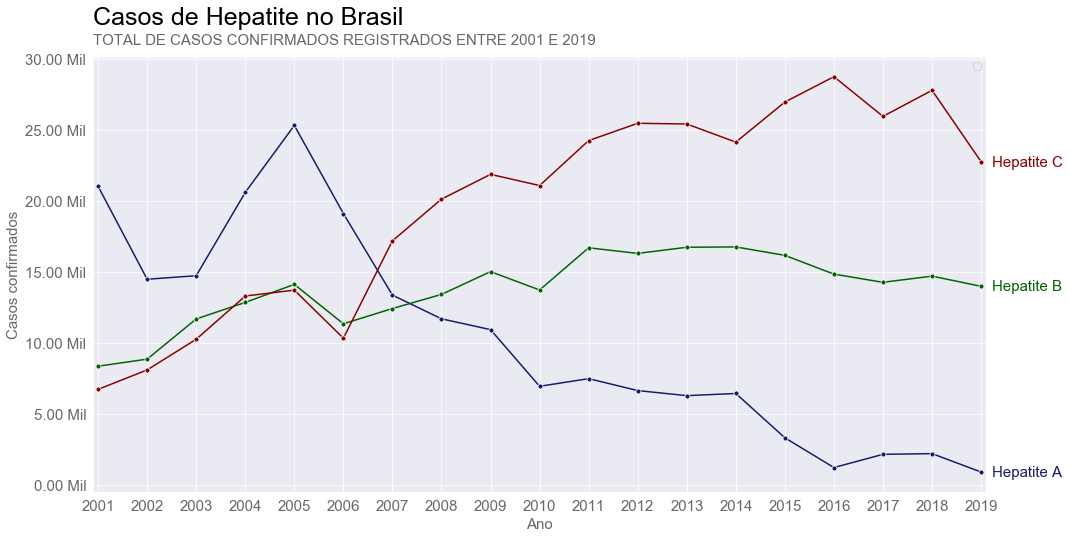

In [15]:
dict_palette = {'A': '#191970', 'B': '#006400', 'C': '#8B0000'}
plota_grafico(dados, 'Ano', 'Casos', hue='virus', title='Casos de Hepatite no Brasil',
          subtitle='TOTAL DE CASOS CONFIRMADOS REGISTRADOS ENTRE 2001 E 2019',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], formatter_y=thousand_formatter, file_name='casos_hep', xlim=[2000.9, 2019.1],
          xlabel='Ano', ylabel='Casos confirmados', marker='.', markersize=10, intervalo_ano=1)

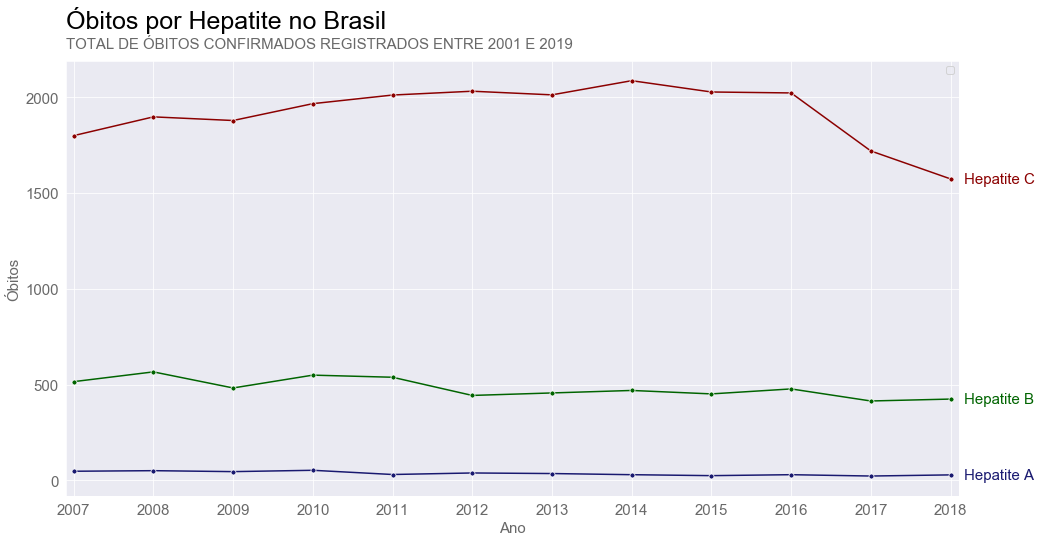

In [16]:
dict_palette = {'A': '#191970', 'B': '#006400', 'C': '#8B0000'}
plota_grafico(dados.dropna(subset=['Obitos']), 'Ano', 'Obitos', hue='virus', title='Óbitos por Hepatite no Brasil',
             subtitle='TOTAL DE ÓBITOS CONFIRMADOS REGISTRADOS ENTRE 2001 E 2019',dict_hue_palette=dict_palette,xlabel='Ano', ylabel='Óbitos',
             hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='obitos_hep', xlim=[2006.9, 2018.1], marker='.', markersize=10,intervalo_ano=1)

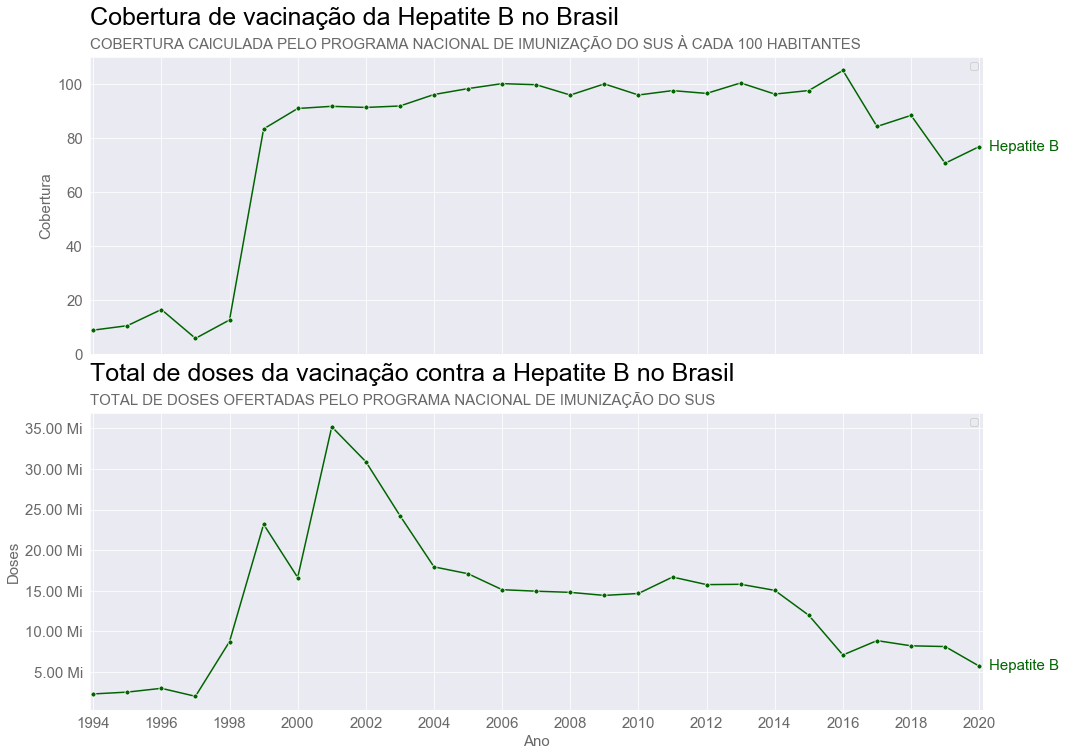

In [17]:
fig, axn = plt.subplots(2,1, figsize=(16,12), sharex=True)

dados_hep_b = dados.query('virus == "B"')

plota_grafico(dados_hep_b, 'Ano', 'Cobertura_vacina_100Hab', hue='virus', dict_hue_palette={'B':'#006400'}, hue_legend=['Hepatite B'], xlim=[1993.9,2020.1],
             title='Cobertura de vacinação da Hepatite B no Brasil', subtitle='COBERTURA CAlCULADA PELO PROGRAMA NACIONAL DE IMUNIZAÇÃO DO SUS À CADA 100 HABITANTES', 
              xlabel='Ano', ylabel='Cobertura', marker='.', markersize=10,  ylim=[0,110], intervalo_ano=2, ax=axn[0], show=False)

plota_grafico(dados_hep_b, 'Ano', 'Doses_totais',  hue='virus', dict_hue_palette={'B':'#006400'}, hue_legend=['Hepatite B'], xlim=[1993.9,2020.1],
             title='Total de doses da vacinação contra a Hepatite B no Brasil', subtitle='TOTAL DE DOSES OFERTADAS PELO PROGRAMA NACIONAL DE IMUNIZAÇÃO DO SUS', 
              xlabel='Ano', ylabel='Doses', marker='.', markersize=10, formatter_y=million_formatter, intervalo_ano=2, ax=axn[1], show=False)

plt.show()

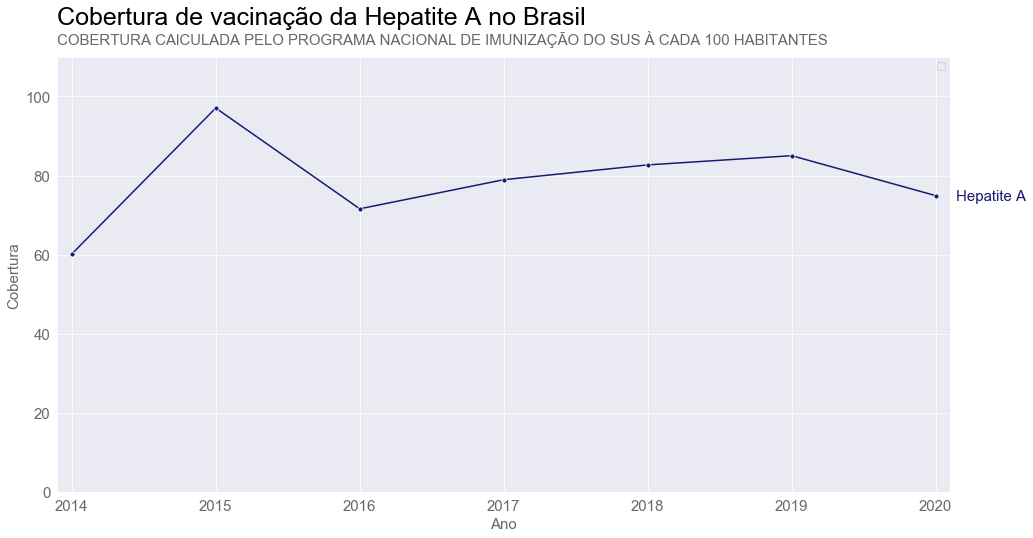

In [18]:
plota_grafico(dados.query('virus == "A"'), 'Ano', 'Cobertura_vacina_100Hab', hue='virus', dict_hue_palette={'A':'#191970'}, hue_legend=['Hepatite A'], xlim=[2013.9,2020.1],
             title='Cobertura de vacinação da Hepatite A no Brasil', subtitle='COBERTURA CAlCULADA PELO PROGRAMA NACIONAL DE IMUNIZAÇÃO DO SUS À CADA 100 HABITANTES', xlabel='Ano', ylabel='Cobertura',  
              marker='.', markersize=10, ylim=[0,110], intervalo_ano=1)

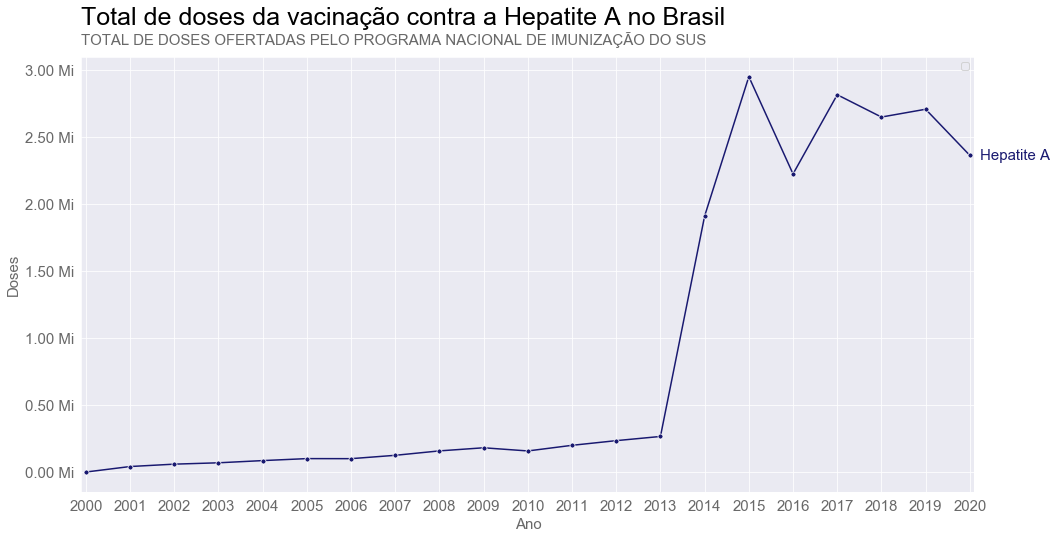

In [19]:
plota_grafico(dados.query('virus == "A"'), 'Ano', 'Doses_totais', hue='virus', dict_hue_palette={'A':'#191970'}, hue_legend=['Hepatite A'], xlim=[1999.9,2020.1],
             title='Total de doses da vacinação contra a Hepatite A no Brasil', subtitle='TOTAL DE DOSES OFERTADAS PELO PROGRAMA NACIONAL DE IMUNIZAÇÃO DO SUS', xlabel='Ano', ylabel='Doses',  
              marker='.', markersize=10, formatter_y=million_formatter, intervalo_ano=1)

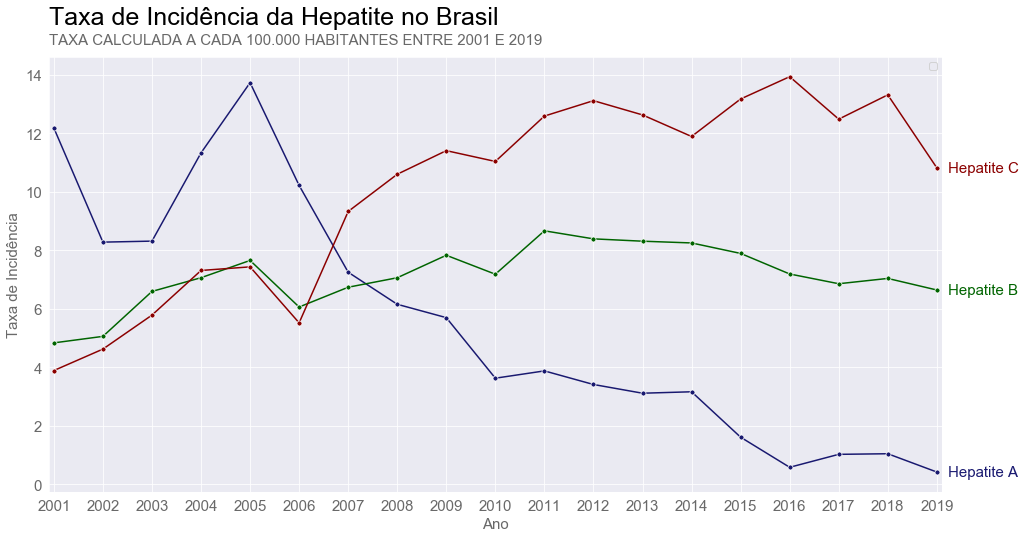

In [20]:
plota_grafico(dados, 'Ano', 'taxa_incid_por100k', hue='virus', title='Taxa de Incidência da Hepatite no Brasil',
          subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES ENTRE 2001 E 2019',dict_hue_palette=dict_palette,
          xlabel='Ano', ylabel='Taxa de Incidência',
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_indic', xlim=[2000.9, 2019.1], marker='.', markersize=10,intervalo_ano=1)

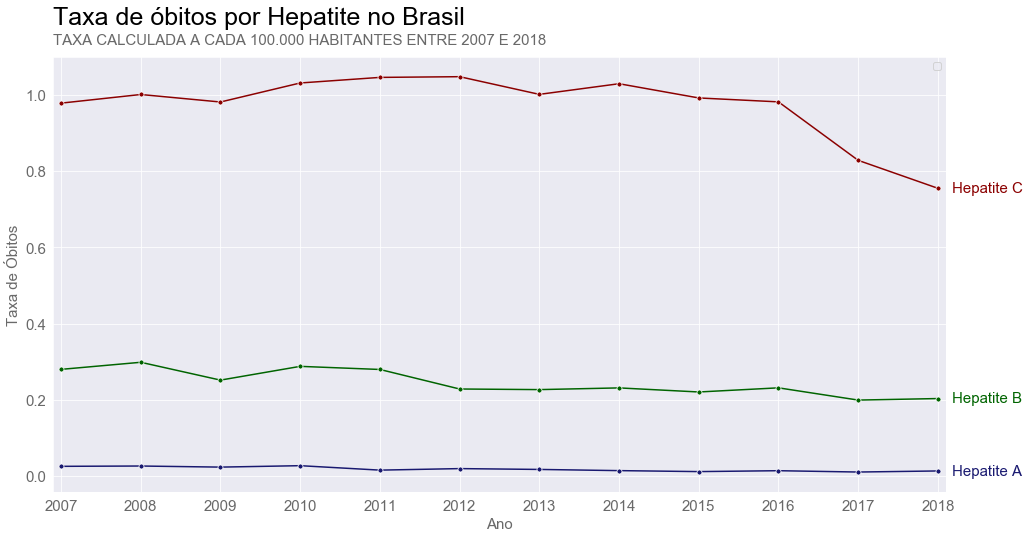

In [21]:
plota_grafico(dados.dropna(subset=['taxa_obitos_por100k']), 'Ano', 'taxa_obitos_por100k', hue='virus', title='Taxa de óbitos por Hepatite no Brasil',
          subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES ENTRE 2007 E 2018',dict_hue_palette=dict_palette,xlabel='Ano', ylabel='Taxa de Óbitos',
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_obitos', xlim=[2006.9, 2018.1], marker='.', markersize=10,intervalo_ano=1)

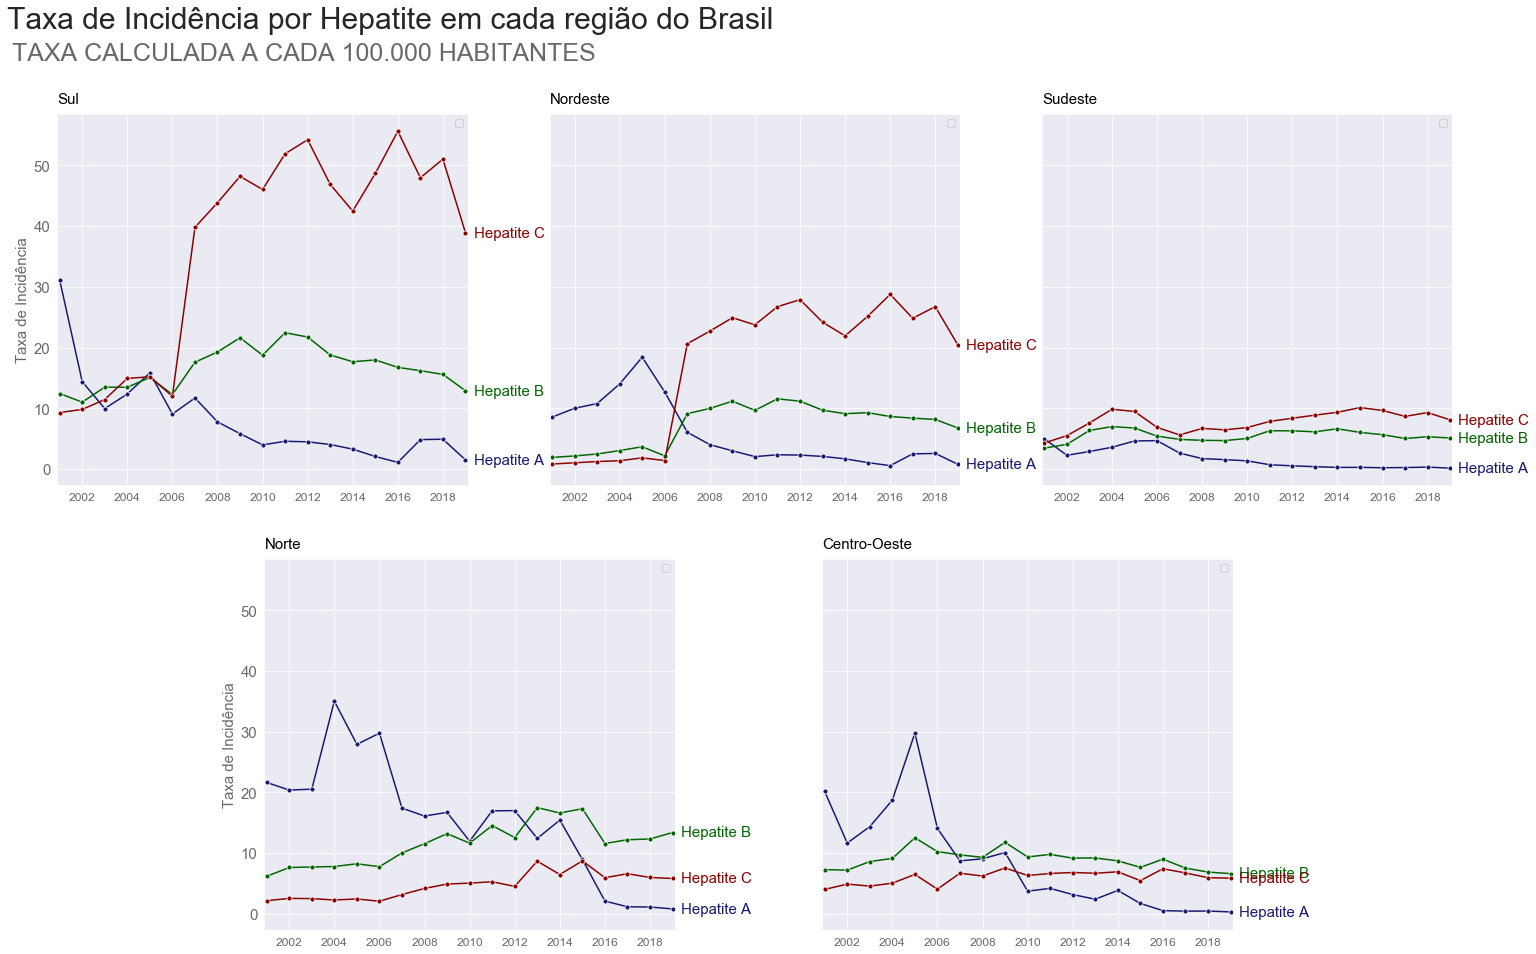

In [22]:
fig, axn = plt.subplots(2,3, sharey=True, figsize=(25,15))

fig.suptitle('Taxa de Incidência por Hepatite em cada região do Brasil', fontsize=30, x=0.31)
fig.text(0.1, 0.93, 'TAXA CALCULADA A CADA 100.000 HABITANTES', fontsize=25, color='dimgray')
for ax, reg in zip(axn.flat,['Sul', 'Nordeste', 'Sudeste', 'Norte', 'Centro-Oeste']):
    plota_grafico(dados_reg[dados_reg['Regiao'] == reg], 'Ano', 'taxa_incid_por100k', hue='virus', subtitle=reg, color_sub='black',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], xlim=[2000.9, 2019.1],
          ylabel='Taxa de Incidência', marker='.', markersize=10, ax=ax, show=False)
    plt.sca(ax)
    plt.xticks(range(2002,2020,2), range(2002, 2020,2))

plt.delaxes(ax= axn[1,2])
axn[1][0].set_position([0.24, 0.125, 0.228, 0.343])
axn[1][1].set_position([0.55, 0.125, 0.228, 0.343])

plt.savefig('../images/taxa_incid_por_reg')

plt.show()

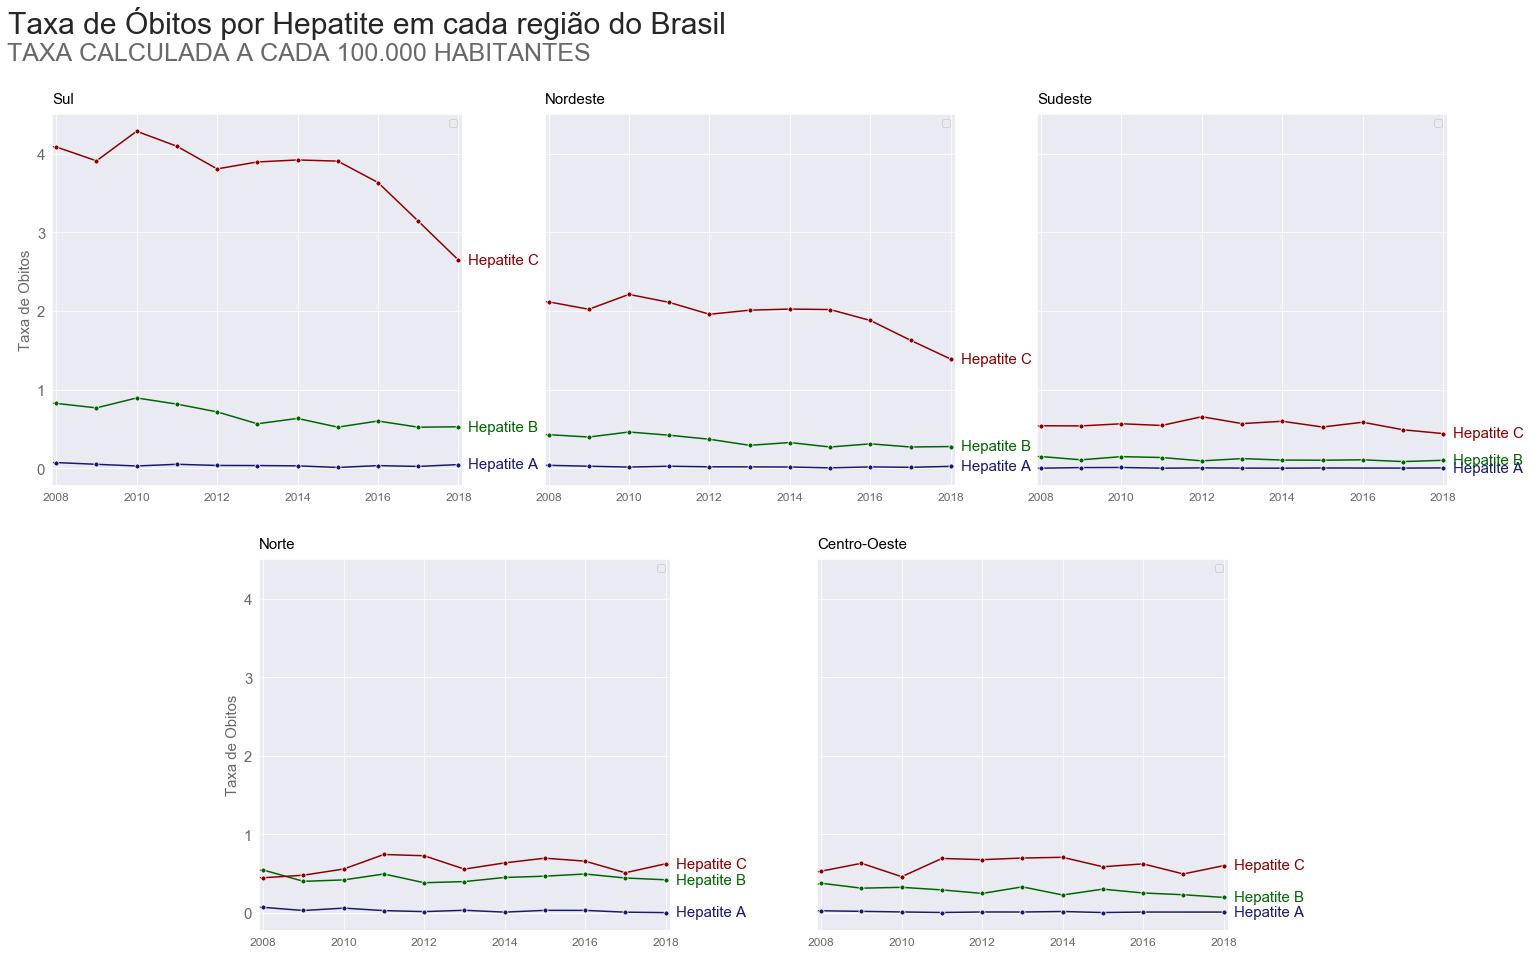

In [23]:
fig, axn = plt.subplots(2,3, sharey=True, figsize=(25,15))

fig.suptitle('Taxa de Óbitos por Hepatite em cada região do Brasil', fontsize=30, x=0.30)
fig.text(0.1, 0.93, 'TAXA CALCULADA A CADA 100.000 HABITANTES', fontsize=25, color='dimgray')
for ax, reg in zip(axn.flat,['Sul', 'Nordeste', 'Sudeste', 'Norte', 'Centro-Oeste']):
    plota_grafico(dados_reg[dados_reg['Regiao'] == reg], 'Ano', 'taxa_obitos_por100k', hue='virus', subtitle=reg, color_sub='black',dict_hue_palette=dict_palette,
          hue_legend=['Hepatite A', 'Hepatite B', 'Hepatite C'], file_name='taxa_obitos_por_reg', xlim=[2007.9, 2018.1],
          ylabel='Taxa de Obitos', marker='.', markersize=10, ax=ax, show=False)
    plt.sca(ax)
    plt.xticks(range(2008,2019,2), range(2008, 2019,2))

plt.delaxes(ax= axn[1,2])
axn[1][0].set_position([0.24, 0.125, 0.228, 0.343])
axn[1][1].set_position([0.55, 0.125, 0.228, 0.343])

plt.savefig('../images/taxa_obitos_por_reg')

plt.show()

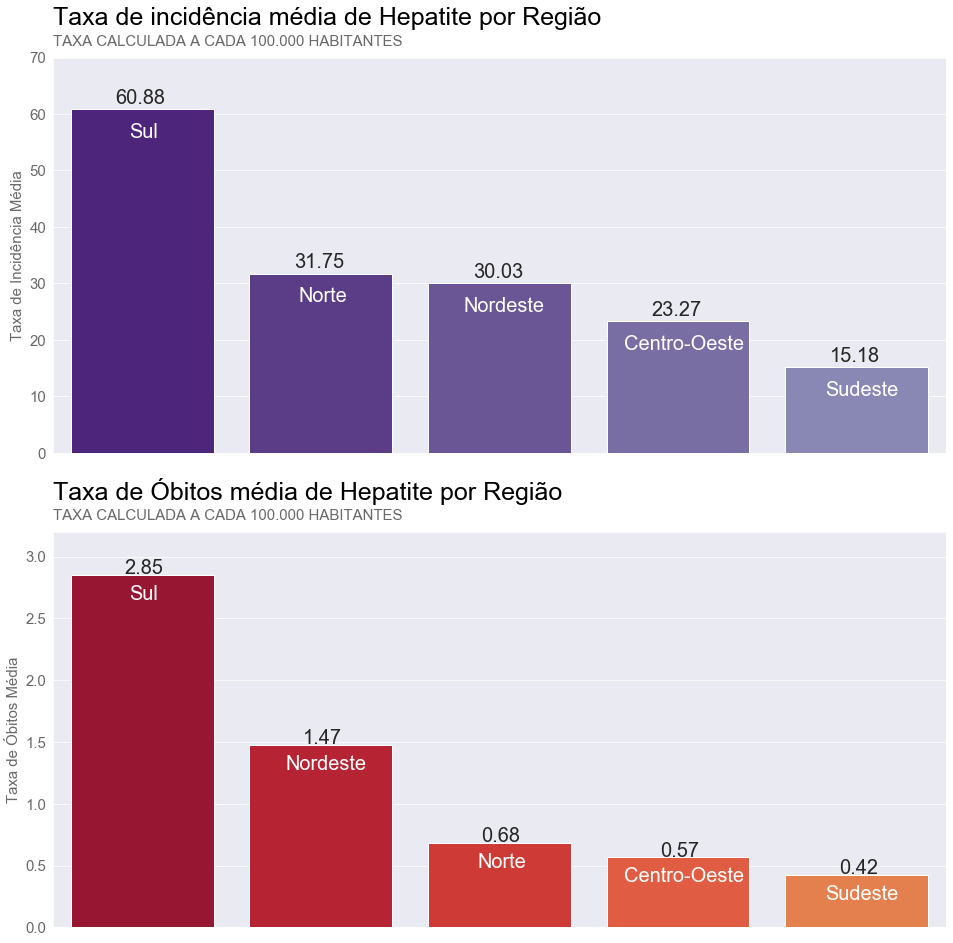

In [24]:
palette_reg_incid = sns.color_palette('Purples_r', 12)
dados_taxa_ind_reg = dados_reg.groupby(['Ano', 'Regiao']).agg({'taxa_incid_por100k':'sum'}).reset_index().\
                     groupby('Regiao').agg({'taxa_incid_por100k':'mean'}).sort_values('taxa_incid_por100k',ascending=False).reset_index()

sns.set_style('darkgrid')
fig, ax = plt.subplots(2,1,figsize=(16,16))
plota_grafico(dados_taxa_ind_reg, 'Regiao', 'taxa_incid_por100k', kind='bar', palette_sns=palette_reg_incid, ax=ax[0], show=False, title='Taxa de incidência média de Hepatite por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', ylabel='Taxa de Incidência Média', ylim=[0,70])
ax[0].set_xticklabels('')

for i,reg in zip(range(0,5),dados_taxa_ind_reg['Regiao'].unique()):
    plt.text(i-0.15,dados_taxa_ind_reg[dados_taxa_ind_reg['Regiao'] == reg]['taxa_incid_por100k']+1, str(round(dados_taxa_ind_reg[dados_taxa_ind_reg['Regiao'] == reg]['taxa_incid_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_ind_reg[dados_taxa_ind_reg['Regiao'] == reg]['taxa_incid_por100k']-5, reg, fontsize=20, color='white')

palette_reg_obitos = sns.color_palette('YlOrRd_r', 10)
dados_taxa_obitos_reg = dados_reg.groupby(['Ano', 'Regiao']).agg({'taxa_obitos_por100k':'sum'}).reset_index().\
                        groupby('Regiao').agg({'taxa_obitos_por100k':'mean'}).sort_values('taxa_obitos_por100k',ascending=False).reset_index()
    
plota_grafico(dados_taxa_obitos_reg, 'Regiao', 'taxa_obitos_por100k', kind='bar', 
              palette_sns=palette_reg_obitos, ax=ax[1], show=False, title='Taxa de Óbitos média de Hepatite por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', ylabel='Taxa de Óbitos Média', ylim=[0,3.2])
ax[1].set_xticklabels('')

for i,reg in zip(range(0,5),dados_taxa_obitos_reg['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_obitos_reg[dados_taxa_obitos_reg['Regiao'] == reg]['taxa_obitos_por100k']+0.01, str(round(dados_taxa_obitos_reg[dados_taxa_obitos_reg['Regiao'] == reg]['taxa_obitos_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_obitos_reg[dados_taxa_obitos_reg['Regiao'] == reg]['taxa_obitos_por100k']-0.2, reg, fontsize=20, color='white')
    
plt.savefig('../images/taxa_incid_reg')

plt.show()

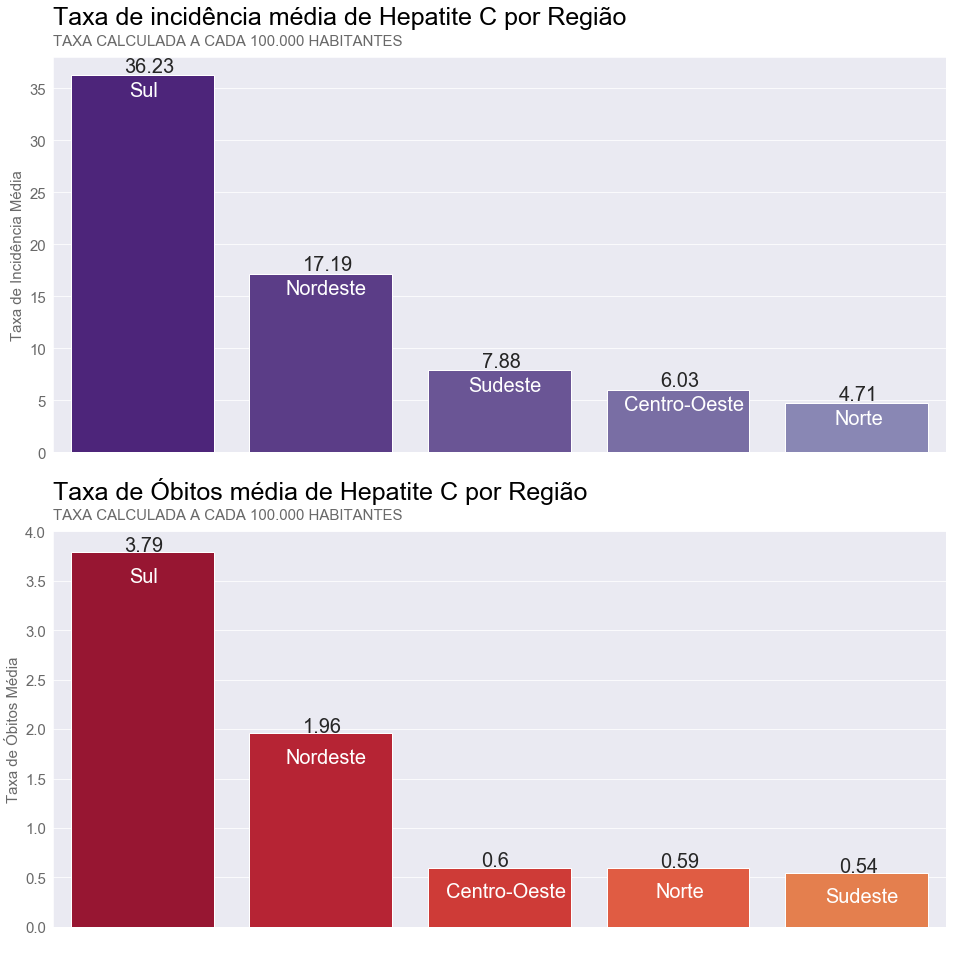

In [25]:
palette_reg_incid = sns.color_palette('Purples_r', 12)
dados_taxa_ind_reg_c = dados_reg[dados_reg['virus'] == 'C'].groupby('Regiao').agg({'taxa_incid_por100k':'mean'}).sort_values('taxa_incid_por100k',ascending=False).reset_index()

fig, ax = plt.subplots(2,1,figsize=(16,16))
plota_grafico(dados_taxa_ind_reg_c, 'Regiao', 'taxa_incid_por100k', kind='bar', 
              color_xticks='white', color_xlabel='white', palette_sns=palette_reg_incid, ax=ax[0], show=False, title='Taxa de incidência média de Hepatite C por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', xlabel='Região', ylabel='Taxa de Incidência Média', ylim=[0,38])

for i,reg in zip(range(0,5),dados_taxa_ind_reg_c['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_ind_reg_c[dados_taxa_ind_reg_c['Regiao'] == reg]['taxa_incid_por100k']+0.3, str(round(dados_taxa_ind_reg_c[dados_taxa_ind_reg_c['Regiao'] == reg]['taxa_incid_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_ind_reg_c[dados_taxa_ind_reg_c['Regiao'] == reg]['taxa_incid_por100k']-2, reg, fontsize=20, color='white')

palette_reg_obitos = sns.color_palette('YlOrRd_r', 10)
dados_taxa_obitos_reg_c = dados_reg[dados_reg['virus'] == 'C'].groupby('Regiao').agg({'taxa_obitos_por100k':'mean'}).sort_values('taxa_obitos_por100k',ascending=False).reset_index()
    
plota_grafico(dados_taxa_obitos_reg_c, 'Regiao', 'taxa_obitos_por100k', kind='bar', 
              color_xticks='white', color_xlabel='white', palette_sns=palette_reg_obitos, ax=ax[1], show=False, title='Taxa de Óbitos média de Hepatite C por Região',
              subtitle='TAXA CALCULADA A CADA 100.000 HABITANTES', xlabel='Região', ylabel='Taxa de Óbitos Média', ylim=[0,4])

for i,reg in zip(range(0,5),dados_taxa_obitos_reg_c['Regiao'].unique()):
    plt.text(i-0.1,dados_taxa_obitos_reg_c[dados_taxa_obitos_reg_c['Regiao'] == reg]['taxa_obitos_por100k']+0.01, str(round(dados_taxa_obitos_reg_c[dados_taxa_obitos_reg_c['Regiao'] == reg]['taxa_obitos_por100k'].values[0],2)), fontsize=20)
    plt.text(i-(len(reg)/40),dados_taxa_obitos_reg_c[dados_taxa_obitos_reg_c['Regiao'] == reg]['taxa_obitos_por100k']-0.3, reg, fontsize=20, color='white')

plt.savefig('../images/taxa_incid_hepC_reg')

plt.show()

# 7 - Conclusões